**First importing numpy,pandas,matplotlib,ydataprofiling & seaborn libraries**

In [1]:
import numpy as np
import pandas as pd
import ydata_profiling    #pandas data profiling is now ydata profiling
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector

**Connecting to snowflake**

In [2]:
conn= snowflake.connector.connect(
user = 'your username',
##password = getpass.getpass('your snowflake password is: '), 
password = 'your password',
account = 'nmemvzg-rl71029',           ##https://nmemvzg-rl71029.snowflakecomputing.com
database = 'RETAILS',
schema = 'PUBLIC',
warehouse = 'COMPUTE_WH'    
)

your snowflake password is: ········


**Setting interaction with databases**

In [4]:
cur = conn.cursor()

**Obtaining all the rows and columns from tables in snowflake**

In [5]:
select_demographic_RAW = 'select * from demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'select * from CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'select * from CAMPAIGN_RAW'
select_PRODUCT_RAW = 'select * from PRODUCT_RAW'
select_COUPON_RAW = 'select * from COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'select * from COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'select * from TRANSACTION_RAW'

**fetching data from a database & returns data as a pandas dataframe.** 

In [6]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [7]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [8]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [9]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [10]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [11]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [12]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [13]:
cur.close()
conn.close()

**Viewing first 5 rows of demographic table**

In [15]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [16]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [27]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [28]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [29]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [30]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [31]:
TRANSACTION_RAW.head(5)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0


**viewing number of rows and columns in tables**

In [32]:
TRANSACTION_RAW.shape

(450416, 12)

In [33]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [34]:
COUPON_RAW.shape

(124548, 3)

In [35]:
PRODUCT_RAW.shape

(92353, 7)

In [36]:
CAMPAIGN_RAW.shape

(7208, 3)

In [37]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [38]:
demographic_RAW.shape

(2500, 8)

**Checking if there is any null value in table**

In [39]:
demographic_RAW.isnull().sum()

AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
HOUSEHOLD_KEY          0
dtype: int64

**observing statistical information about the columns in table**

In [44]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [40]:
CAMPAIGN_DESC_RAW.isnull().sum()

DESCRIPTION    0
CAMPAIGN       0
START_DAY      0
END_DAY        0
dtype: int64

In [45]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [41]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [46]:
CAMPAIGN_RAW.describe()

,HOUSEHOLD_KEY,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [47]:
PRODUCT_RAW.isnull().sum()

PRODUCT_ID              0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [48]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [49]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [50]:
COUPON_RAW.describe()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [51]:
COUPON_REDEMPT_RAW.isnull().sum()

HOUSEHOLD_KEY    0
DAY              0
COUPON_UPC       0
CAMPAIGN         0
dtype: int64

In [52]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [53]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

**importing datetime and timedelta functions from datetime module**
**Then a variable is created which stores the date '2020-01-01' in datetime format**

In [14]:
from datetime import datetime,timedelta

In [15]:
start_date = pd.to_datetime('2020-01-01')

In [17]:
start_date

Timestamp('2020-01-01 00:00:00')

In [57]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0,0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0,0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0,0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0,0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0,0


**As there is no date column so we will insert a column and fill this column by converting day into date and time.**

In [16]:
TRANSACTION_RAW['Date'] = start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'], unit='D')

**Viewing first 10 rows of Date column**

In [60]:
TRANSACTION_RAW['Date'].head(10)

0   2020-01-02
1   2020-01-02
2   2020-01-02
3   2020-01-02
4   2020-01-02
5   2020-01-02
6   2020-01-02
7   2020-01-02
8   2020-01-02
9   2020-01-02
Name: Date, dtype: datetime64[ns]

**Checking datatypes of all the columns in Transaction_Raw table.**

In [37]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
DAY                           int16
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
WEEK_NO                        int8
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
Date                 datetime64[ns]
dtype: object

**Converting days into date and time.**

In [17]:
CAMPAIGN_DESC_RAW['start_date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'], unit='D' )

In [18]:
CAMPAIGN_DESC_RAW['end_date'] = start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'], unit ='D')

In [65]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_date,end_date
0,TypeB,24,659,719,2021-10-21,2021-12-20
1,TypeC,15,547,708,2021-07-01,2021-12-09
2,TypeB,25,659,691,2021-10-21,2021-11-22
3,TypeC,20,615,685,2021-09-07,2021-11-16
4,TypeB,23,646,684,2021-10-08,2021-11-15
5,TypeB,21,624,656,2021-09-16,2021-10-18
6,TypeB,22,624,656,2021-09-16,2021-10-18
7,TypeA,18,587,642,2021-08-10,2021-10-04
8,TypeB,19,603,635,2021-08-26,2021-09-27
9,TypeB,17,575,607,2021-07-29,2021-08-30


**Finding the duration of campaign and storing it ina new column 'campaign_duration'**

In [19]:
CAMPAIGN_DESC_RAW['campaign_duration'] = CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY']

In [22]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_date,end_date,campaign_duration
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38
5,TypeB,21,624,656,2021-09-16,2021-10-18,32
6,TypeB,22,624,656,2021-09-16,2021-10-18,32
7,TypeA,18,587,642,2021-08-10,2021-10-04,55
8,TypeB,19,603,635,2021-08-26,2021-09-27,32
9,TypeB,17,575,607,2021-07-29,2021-08-30,32


In [20]:
COUPON_REDEMPT_RAW['Date'] = start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'], unit ='D')

In [69]:
COUPON_REDEMPT_RAW.head(10)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
5,8,422,53600000078,8,2021-02-26
6,13,396,53700048182,5,2021-01-31
7,13,424,10000085364,8,2021-02-28
8,13,434,53600000078,8,2021-03-10
9,13,447,52370020076,8,2021-03-23


**Checking last date in table**

In [70]:
COUPON_REDEMPT_RAW['Date'].max()

Timestamp('2021-12-05 00:00:00')

In [72]:
CAMPAIGN_DESC_RAW['end_date'].max()

Timestamp('2021-12-20 00:00:00')

In [73]:
TRANSACTION_RAW['Date'].max()

Timestamp('2020-06-25 00:00:00')

**Understanding tables**

In [74]:
demographic_RAW.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
HOUSEHOLD_KEY           int16
dtype: object

**Distribution of data age wise.
Total number of customers in each age group**

In [75]:
demographic_RAW['AGE_DESC'].value_counts()

45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: AGE_DESC, dtype: int64

**Counts the households by household size.**

In [76]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

2     1004
1      783
3      338
5+     206
4      169
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

In [26]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_date,end_date,campaign_duration
0,TypeB,24,659,719,2021-10-21,2021-12-20,60
1,TypeC,15,547,708,2021-07-01,2021-12-09,161
2,TypeB,25,659,691,2021-10-21,2021-11-22,32
3,TypeC,20,615,685,2021-09-07,2021-11-16,70
4,TypeB,23,646,684,2021-10-08,2021-11-15,38
5,TypeB,21,624,656,2021-09-16,2021-10-18,32
6,TypeB,22,624,656,2021-09-16,2021-10-18,32
7,TypeA,18,587,642,2021-08-10,2021-10-04,55
8,TypeB,19,603,635,2021-08-26,2021-09-27,32
9,TypeB,17,575,607,2021-07-29,2021-08-30,32


**Finding mean value of campaign duration in table CAMPAIGN_DESC_RAW**

In [27]:
CAMPAIGN_DESC_RAW['campaign_duration'].mean()

46.6

In [28]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
start_date           datetime64[ns]
end_date             datetime64[ns]
campaign_duration             int16
dtype: object

**constructing bar graph between variables campaign and campaign duration**
**using matplot and seaborn libraries**

<Axes: xlabel='CAMPAIGN', ylabel='campaign_duration'>

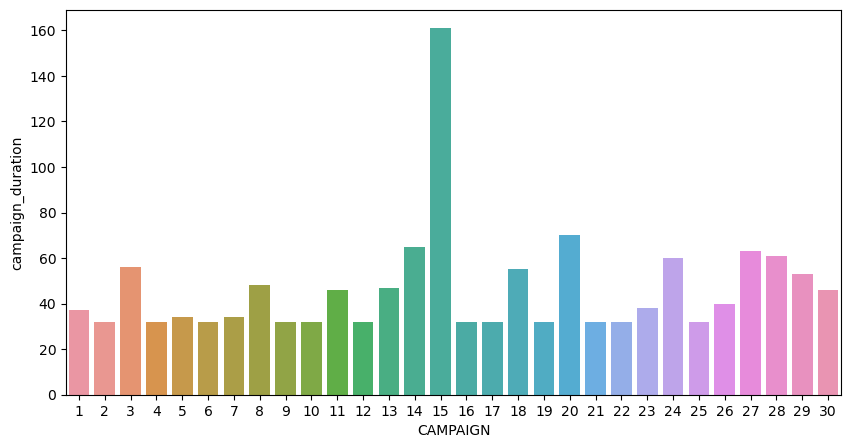

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='CAMPAIGN', y = 'campaign_duration', data = CAMPAIGN_DESC_RAW)

**Finding number of campaigns and mean of campaign_duration under different campaign types using groupby function**

In [32]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','campaign_duration':'mean'})

,CAMPAIGN,campaign_duration
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


**Extracting month & year from date columns and storing them in new columns.**

In [21]:
CAMPAIGN_DESC_RAW['start_month'] = CAMPAIGN_DESC_RAW['start_date'].dt.strftime('%m')

In [22]:
CAMPAIGN_DESC_RAW['end_month'] = CAMPAIGN_DESC_RAW['end_date'].dt.strftime('%m')

In [23]:
CAMPAIGN_DESC_RAW['start_year'] = CAMPAIGN_DESC_RAW['start_date'].dt.strftime('%Y')

In [24]:
CAMPAIGN_DESC_RAW['end_year'] = CAMPAIGN_DESC_RAW['end_date'].dt.strftime('%Y')

**Checking for the new columns added**

In [75]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11,2021,2021


**Understanding CAMPAIGN_DESC_RAW table**

In [43]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION                  object
CAMPAIGN                       int8
START_DAY                     int16
END_DAY                       int16
start_date           datetime64[ns]
end_date             datetime64[ns]
campaign_duration             int16
start_month                  object
end_month                    object
start_year                   object
dtype: object

In [76]:
CAMPAIGN_DESC_RAW.shape

(30, 11)

In [45]:
CAMPAIGN_RAW.columns

Index(['DESCRIPTION', 'HOUSEHOLD_KEY', 'CAMPAIGN'], dtype='object')

In [47]:
CAMPAIGN_RAW.count()

DESCRIPTION      7208
HOUSEHOLD_KEY    7208
CAMPAIGN         7208
dtype: int64

**Checking for how many households have participated in the campaign.**

In [48]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

**Checking In how many campaigns the households have participated**

In [51]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

**Constructing bar graph to have a look on participation of households in campaigns.**

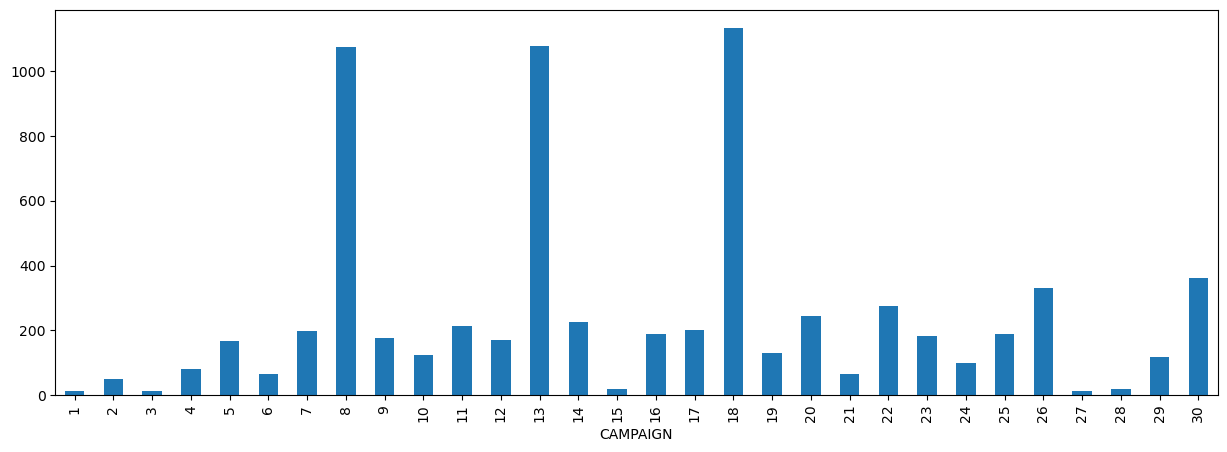

In [57]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel='Number of household reached to'

** Maximun number of households participated in campaign 18

**Understanding coupon_raw table**

In [58]:
COUPON_RAW.shape

(124548, 3)

In [59]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

**Finding Total number of coupons distributed**

In [60]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

**Finding number of coupons given against  total products in each campaign. Then storing the result in a variable 'Coupon_Given'**

In [25]:
Coupon_Given = COUPON_RAW.groupby('CAMPAIGN').aggregate(Total_products = ('PRODUCT_ID','nunique'),
                                         Total_coupon_given= ('COUPON_UPC','nunique'))

In [84]:
Coupon_Given.sort_values(by = 'Total_products', ascending = False).head(10)

,Total_products,Total_coupon_given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181
22,1917,21
24,1887,2
16,1025,13
25,826,17


**Joining Coupon_Given and CAMPAIGN_DESC_RAW tables and naming mergerd table as Coupon_Given**

In [26]:
Coupon_Given = Coupon_Given.merge(right = CAMPAIGN_DESC_RAW, on = 'CAMPAIGN', how='left')

In [87]:
Coupon_Given.head(5)

,CAMPAIGN,Total_products,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2021,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2021,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2021,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [88]:
Coupon_Given.columns

Index(['CAMPAIGN', 'Total_products', 'Total_coupon_given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'start_date', 'end_date', 'campaign_duration',
       'start_month', 'end_month', 'start_year', 'end_year'],
      dtype='object')

**Giving first 10  rows and specified columns of table Coupon_Given sorted by 'Total_products'in descending order**

In [90]:
Coupon_Given.loc[:,('CAMPAIGN', 'Total_products', 'Total_coupon_given','start_year', 'end_year','start_month', 'end_month','DESCRIPTION',
      'campaign_duration')].sort_values(by = 'Total_products', ascending = False).head(10)

,CAMPAIGN,Total_products,Total_coupon_given,start_year,end_year,start_month,end_month,DESCRIPTION,campaign_duration
12,13,35616,207,2021,2021,05,07,TypeA,47
17,18,35513,209,2021,2021,08,10,TypeA,55
7,8,17178,209,2021,2021,02,04,TypeA,48
25,26,3396,181,2020,2020,08,09,TypeA,40
29,30,3205,181,2021,2021,11,01,TypeA,46
21,22,1917,21,2021,2021,09,10,TypeB,32
23,24,1887,2,2021,2021,10,12,TypeB,60
15,16,1025,13,2021,2021,07,08,TypeB,32
24,25,826,17,2021,2021,10,11,TypeB,32
8,9,825,18,2021,2021,03,04,TypeB,32


In [92]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [95]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


**Joining tables COUPON_RAW and PRODUCT_RAW and naming newly created table as COUPON_PRODUCT.**

In [27]:
COUPON_PRODUCT = COUPON_RAW.merge(right = PRODUCT_RAW, on  = 'PRODUCT_ID', how = 'left')

In [97]:
COUPON_PRODUCT.head(5)  

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


**Finding Top 10 products on which coupon have been applied**

In [99]:
COUPON_PRODUCT['COMMODITY_DESC'].value_counts().head(10)

HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: COMMODITY_DESC, dtype: int64

** Most prominent products among coupons created are bathroom products such as hair care and makeup

In [110]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

In [106]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'Date'], dtype='object')

**Finding total number of coupons redeemed out of 1135 coupons(distributed)**

In [108]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

**Showing through bar graph the coupons redeemed given during particular campaigns.**

<Axes: xlabel='CAMPAIGN'>

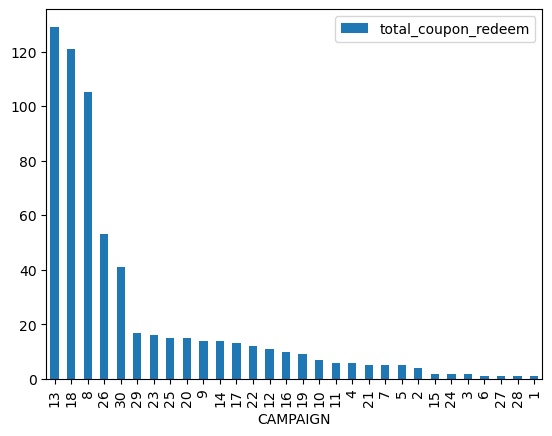

In [115]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redeem = ('COUPON_UPC', 'nunique')).sort_values(
    by ='total_coupon_redeem',ascending = False ).plot.bar()

** coupons of campaign 13 are mostly redeemed

**Showing first 5 records sorted by the coupons redeemed given during particular campaigns.**

In [28]:
coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').aggregate(total_coupon_redeem = ('COUPON_UPC', 'nunique'))
coupon_redeem.sort_values (by = 'total_coupon_redeem' ,ascending = False).head(5)

,total_coupon_redeem
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41


coupons of campaigns 13,18 and 8 are mostly redeemed.

In [117]:
Coupon_Given.head()

,CAMPAIGN,Total_products,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2021,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2021,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2021,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


**Joining two tables coupon_redeem and Coupon_Given and naming newly created table as coupon_redeem.**

In [29]:
coupon_redeem = coupon_redeem.merge(right = Coupon_Given, on ='CAMPAIGN', how = 'left')

In [120]:
coupon_redeem.head()

,CAMPAIGN,total_coupon_redeem,Total_products,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2021,2021
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2021,2021
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2021,2021
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


**Inserting a new column 'coupon_redeem_rate' along with calculated values in table coupon_redeem.**

In [30]:
coupon_redeem['coupon_redeem_rate'] = (coupon_redeem['total_coupon_redeem'] / coupon_redeem['Total_coupon_given'])*100

**Sorting the table in descending order by coupon_redeem_rate**

In [123]:
coupon_redeem.sort_values(by = 'coupon_redeem_rate', ascending = False).head()

,CAMPAIGN,total_coupon_redeem,Total_products,Total_coupon_given,DESCRIPTION,START_DAY,END_DAY,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year,coupon_redeem_rate
23,24,2,1887,2,TypeB,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021,100.000000
5,6,1,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,2021,2021,100.000000
14,15,2,55,2,TypeC,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021,100.000000
22,23,16,767,18,TypeB,646,684,2021-10-08,2021-11-15,38,10,11,2021,2021,88.888889
24,25,15,826,17,TypeB,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021,88.235294


**Showcasing coupon redeem rate of each campaign through bar graph**

<Axes: xlabel='CAMPAIGN', ylabel='coupon_redeem_rate'>

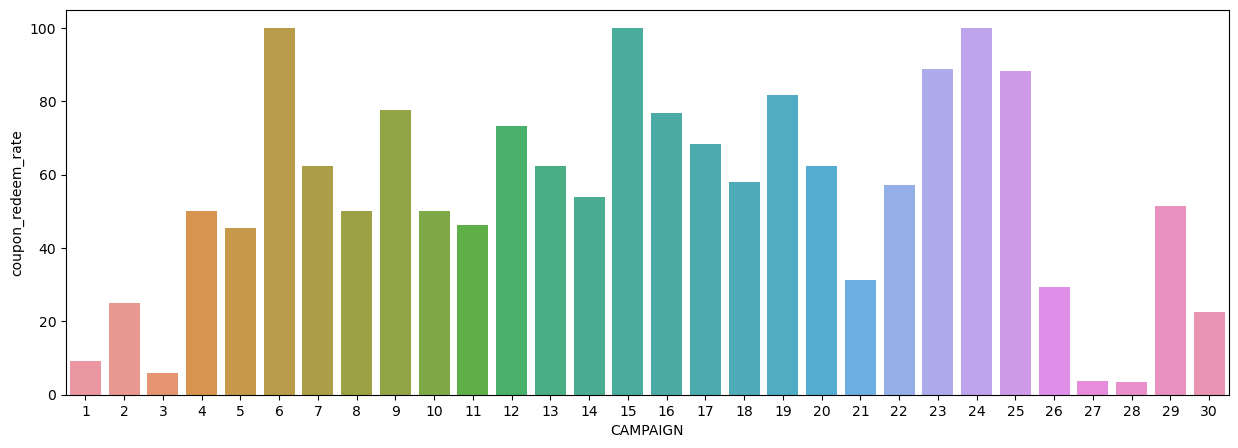

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN', y = 'coupon_redeem_rate', data = coupon_redeem )

**Checking for null values in TRANSACTION_RAW.**

In [37]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Date                 0
dtype: int64

**Finding total number of BASKET_ID.**

In [39]:
TRANSACTION_RAW['BASKET_ID'].count()

450416

**Finding total number of unique BASKET_ID.**

In [40]:
TRANSACTION_RAW['BASKET_ID'].nunique()

50479

In [46]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
DAY                           int16
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
WEEK_NO                        int8
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
Date                 datetime64[ns]
dtype: object

**Finding overall sales amount,coupon discount and coupon match discount of each basket_id and storing it in table trnx_bucket**

In [31]:
trnx_bucket = TRANSACTION_RAW.groupby('BASKET_ID').agg({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum' })

In [54]:
trnx_bucket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0


**Creating a column 'use_coupon' in table trnx_bucket. If COUPON_DISC is no equal to 0
it will store true otherwise store false.  The next statement gives total count of true and false.**

In [32]:
trnx_bucket['use_coupon'] = (trnx_bucket['COUPON_DISC'] != 0)
trnx_bucket['use_coupon'].value_counts()

False    47892
True      2587
Name: use_coupon, dtype: int64

#There is 2587 transactions that have used coupons

**Giving first 5 rows of trnx_bucket table sorted by SALES_VALUE in descending order**

In [58]:
trnx_bucket.sort_values('SALES_VALUE',ascending = False).head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,use_coupon
BASKET_ID,,,,
27534431747,465.70,-3,-1,True
27798435271,463.17,-2,-2,True
27093315740,400.79,0,0,False
28941937397,400.56,-1,0,True
28210676830,391.05,0,0,False


**Finding mean of SALES_VALUE rounded to two decimal digits**

In [61]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

26.93

**Finding outliers in sales value by drawing boxplot.**

Text(0.5, 1.0, 'Bascket Value BoxPlot')

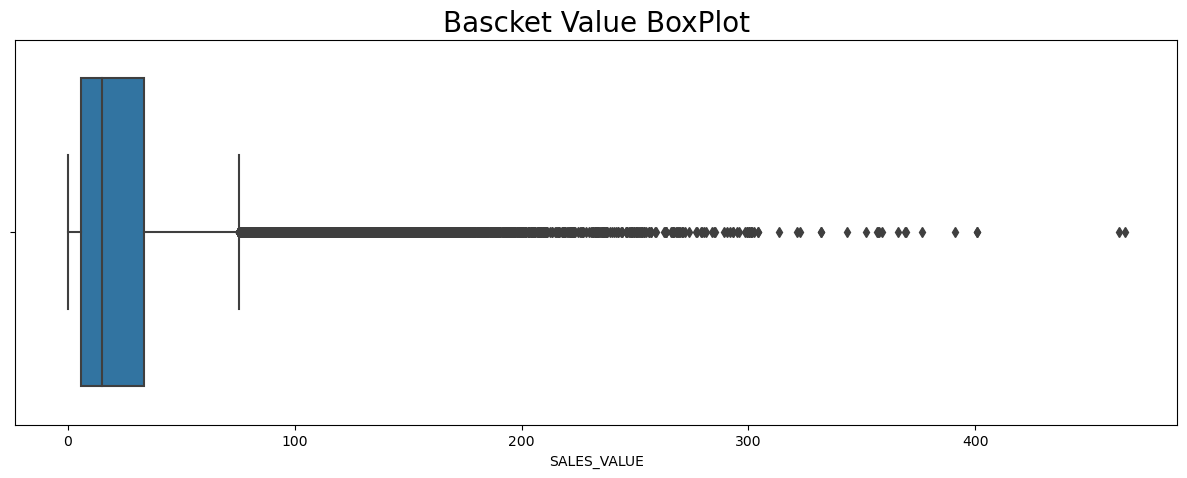

In [63]:
plt.figure(figsize=(15,5))
sns.boxplot(x= trnx_bucket['SALES_VALUE'])
plt.title('Bascket Value BoxPlot', fontsize = 20)

**Finding mean of SALES_VALUE, COUPON_DISC, COUPON_MATCH_DISC & count of COUPON_DISC**

In [65]:
trnx_bucket.groupby('use_coupon').agg(Sales_mean=('SALES_VALUE','mean'),
                   coupon_disc_mean=('COUPON_DISC','mean'),
                    coupon_match_mean=('COUPON_MATCH_DISC','mean'),
                    no_coupon =('COUPON_DISC','count'))

,Sales_mean,coupon_disc_mean,coupon_match_mean,no_coupon
use_coupon,,,,
False,25.009980,0.000000,0.000000,47892
True,62.533348,-2.587167,-0.334364,2587


** Average sale of Bucket when the coupon is used is $62.53

** It shows that customeer purchase more product when coupon is given to them

**Creating a new table by joinig TRANSACTION_RAW & trnx_bucket. Now we can better analyse sales in respect of use_coupons**

In [33]:
trxn_desc = TRANSACTION_RAW.merge( right = trnx_bucket, on = 'BASKET_ID' , how = 'left')

In [34]:
trxn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,5.91,0,0,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,5.91,0,0,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,5.91,0,0,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,5.91,0,0,False


**droping duplicate columns**

In [34]:
trxn_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis =1,inplace = True)

In [36]:
trxn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,use_coupon
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,False
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,False
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,False
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,False
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,False


**Joining trxn_desc & PRODUCT_RAW so that we can better analyse sales with respect to products.**

In [35]:
trxn_desc = trxn_desc.merge(right =PRODUCT_RAW, on = 'PRODUCT_ID',how = 'left')

In [77]:
trxn_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,use_coupon,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0,0,2020-01-02,False,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0,0,2020-01-02,False,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0,0,2020-01-02,False,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


**Extracting from trxn_desc, quantity sold,total discount given & total coupons used
for each commodity using group by and aggregate function and  storing the information in
variable COMMODITY_Coupon** 

In [36]:
COMMODITY_Coupon = trxn_desc.groupby('COMMODITY_DESC').agg(Total_Quantity = ('QUANTITY','count'),
                                                           use_coupon = ('use_coupon', 'sum'),
                                                           coupon_desc = ('COUPON_DISC_x','sum'))

In [61]:
COMMODITY_Coupon

,Total_Quantity,use_coupon,coupon_desc
COMMODITY_DESC,,,
,1303,872,-1396
(CORP USE ONLY),12,0,0
ADULT INCONTINENCE,74,3,-1
AIR CARE,928,193,-124
ANALGESICS,681,89,-3
...,...,...,...
WAREHOUSE SNACKS,1846,213,-18
WATCHES/CALCULATORS/LOBBY,12,0,0
WATER,363,36,0


**Finding the percentage of coupon used & storing the result in a new column 'coupon%' in COMMODITY_Coupon table** 

In [37]:
COMMODITY_Coupon['coupon%'] = round((COMMODITY_Coupon['use_coupon']/COMMODITY_Coupon['Total_Quantity'])*100,2)

**Sorting the table by coupon%  in descending order and showing only the first 10 rows.**

In [64]:
COMMODITY_Coupon.sort_values('coupon%', ascending = False).head(10)

,Total_Quantity,use_coupon,coupon_desc,coupon%
COMMODITY_DESC,,,,
NATURAL VITAMINS,1,1,-5,100.00
,1303,872,-1396,66.92
VALENTINE,5,2,0,40.00
BABY FOODS,3664,1114,-38,30.40
RW FRESH PROCESSED MEAT,7,2,0,28.57
DIAPERS & DISPOSABLES,864,231,-215,26.74
BABY HBC,817,181,-82,22.15
AIR CARE,928,193,-124,20.80
FRZN BREAKFAST FOODS,1743,347,-61,19.91


**Finding the sum of sales_value, sum of retail_discount, sum of coupon_discount,
sum of coupon_match_discount of each household for each week_no. & day**

In [65]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).agg({'SALES_VALUE':'sum','RETAIL_DISC':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          21      145        50.23        -2.02           -3   
              22      150        55.03        -2.17            0   
              26      174       110.30       -49.05           -1   
                      175        10.59         0.00           -2   
                      176        20.26        -2.51            0   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          21      145                  0  
              22      150                  0  
              26      174                  0  
                      175                  0  
                      176                  0  

[40506 rows x 4 columns]

**Finding the sum of sales_value, sum of retail_discount, sum of coupon_discount, 
sum of coupon_match_discount for each month to find corelation between sale & discounts.**

In [68]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['Date'].dt.month).agg({'SALES_VALUE':'sum','RETAIL_DISC':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC
Date,,,,
1,55507.48,-10690.45,-271,-37
2,114855.91,-21125.82,-497,-58
3,221019.50,-42163.76,-853,-124
4,317907.86,-61581.70,-1843,-199
5,353811.70,-62508.80,-1401,-234
6,296449.28,-50907.58,-1828,-213


** sale value increases as retail discount and coupon discount increases.

**Droping the columns which are not required for analysis**

**Importing datetime function from datetime module** 

In [38]:
from datetime import datetime

**droping columns 'START_DAY','END_DAY' as  we have created date columns against them**

In [39]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis = 1,inplace = True)

In [71]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,start_date,end_date,campaign_duration,start_month,end_month,start_year,end_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,11,2021,2021


In [75]:
CAMPAIGN_DESC_RAW.dtypes  

DESCRIPTION                  object
CAMPAIGN                       int8
start_date           datetime64[ns]
end_date             datetime64[ns]
campaign_duration             int16
start_month                  object
end_month                    object
start_year                   object
end_year                     object
dtype: object

**Changing datatype of column 'start_date' from datetime64[ns] to object as it create problem 
when sending the tables back to snowflake**

In [40]:
CAMPAIGN_DESC_RAW['start_date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['start_date']).apply(lambda x : x.date())

In [83]:
type(CAMPAIGN_DESC_RAW['start_date'])

pandas.core.series.Series

In [84]:
CAMPAIGN_DESC_RAW['start_date']

0     2021-10-21
1     2021-07-01
2     2021-10-21
3     2021-09-07
4     2021-10-08
5     2021-09-16
6     2021-09-16
7     2021-08-10
8     2021-08-26
9     2021-07-29
10    2021-06-15
11    2021-07-15
12    2021-05-19
13    2021-04-22
14    2021-04-22
15    2021-04-08
16    2021-03-11
17    2021-02-16
18    2021-02-02
19    2021-01-28
20    2020-12-22
21    2021-01-12
22    2021-01-07
23    2020-12-12
24    2020-12-17
25    2020-11-19
26    2020-10-08
27    2020-09-16
28    2020-08-25
29    2020-08-12
Name: start_date, dtype: object

In [41]:
CAMPAIGN_DESC_RAW['end_date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['end_date']).apply(lambda x : x.date())

**Checking datatypes of columns**

In [90]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
start_date           object
end_date             object
campaign_duration     int16
start_month          object
end_month            object
start_year           object
end_year             object
dtype: object

**Droping column 'DAY'**

In [42]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis = 1, inplace = True)

In [96]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY             int16
COUPON_UPC                int64
CAMPAIGN                   int8
Date             datetime64[ns]
dtype: object

In [43]:
COUPON_REDEMPT_RAW['Date'] = pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [98]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [44]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace = True)

In [101]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY                 int16
BASKET_ID                     int64
PRODUCT_ID                    int32
QUANTITY                      int32
SALES_VALUE                 float64
STORE_ID                      int16
RETAIL_DISC                 float64
TRANS_TIME                    int16
COUPON_DISC                    int8
COUPON_MATCH_DISC              int8
Date                 datetime64[ns]
dtype: object

In [45]:
TRANSACTION_RAW['Date'] = pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x : x.date())

In [103]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

**Now Loading Data to DataBase**

In [48]:
from sqlalchemy import create_engine
from sqlalchemy.engine import url
import snowflake.connector as snowctx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [50]:
conn= snowflake.connector.connect(
user = 'savita',
##password = getpass.getpass('your snowflake password is: '),  
password = 'S15#kumar',
account = 'nmemvzg-rl71029',           ##https://nmemvzg-rl71029.snowflakecomputing.com
database = 'RETAILS',
schema = 'PUBLIC',
warehouse = 'COMPUTE_WH'    
)

your snowflake password is: ········


In [51]:
cur = conn.cursor()

In [55]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

**Creating schema of table to load data in it and then send to snowflake**

In [52]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [56]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int16
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

In [53]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [57]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION          object
CAMPAIGN               int8
start_date           object
end_date             object
campaign_duration     int16
start_month          object
end_month            object
start_year           object
end_year             object
dtype: object

In [58]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
start_date date,
end_date  date,
campaign_duration NUMBER(38,0),
start_month VARCHAR(10),
end_month VARCHAR(10),
start_year INT,
end_year INT)''')

**The write_pandas function writes a pandas dataframe to a database table.**

In [59]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW, 'CAMPAIGN_DESC_NEW', quote_identifiers = False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [60]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW, 'COUPON_REDEMPT_NEW', quote_identifiers = False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [61]:
success, nchunks, nrows, _ = write_pandas(conn, TRANSACTION_RAW, 'TRANSACTION_NEW', quote_identifiers = False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,450416


In [62]:
cur.close()
conn.close()